In [112]:
#Verify the CPU setup
import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(85.178375, shape=(), dtype=float32)


In [113]:
#verify GPU setup
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[]


1. Install Dependencies and Setup

In [114]:
#import tensorflow flow and opencv for the model
# TensorFlow  used for building, training, and deploying deep learning models, including CNNs (Convolutional Neural Networks).
# OpenCV (Open Source Computer Vision Library) is an open-source computer vision use for, Image and video processing, Image augmentation (e.g., resizing, cropping, rotating images).
# Computer vision tasks like object detection, face recognition.
!pip install tensorflow opencv-python matplotlib

In [115]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
altair                    5.3.0
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.8.2
cachetools                5.3.3
certifi                   2024.6.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.2
decorator                 5.1.1
defusedxml                0.7.1
distlib                   0.3.8
executing                 2.0.1
fastjsonschema     

In [116]:
# for building, training, and deploying deep learning models,
import tensorflow as tf
# for intracting operating system  and manuplating files and directories
import os
# for plotting various graph
from matplotlib import pyplot as plt

In [117]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2. Remove dodgy images

In [118]:
# Working with image and video processing functions
import cv2
# determines the type of image contained in a file or byte stream.
import imghdr

In [119]:
# set directory where data is saved
data_dir = 'deeplearning' 

In [120]:
#list all the directory present in working folder
# join the directory to access the images in one line
os.listdir(os.path.join(data_dir,'puppies'))

['.ipynb_checkpoints',
 '0000655001540319655.jpg',
 '03-june_puppies.jpg',
 '0992_01_4x3L.jpg',
 '1VPra30HqtU1iPTkFaM2fow.png',
 '2021-11-24_Singleton_Puppy_Syndrome_One_Puppy_Litter.jpg',
 '210601-main-pups-canine-companions-for-independence-ew-113p.jpg',
 '36b4ef433ac9c2cf9d34e54aa3a38340.jpg',
 '536413-gettyimages-1207430371-458be6339696aa7d3539e96b06bd08c9.jpg',
 '811hvGypcPL.png',
 'aabb34_461127eb3a14469b86f7ad942f931a79mv2.jpg',
 'AdobeStock274064877_360x316.jpeg',
 'AdobeStock_472713009.jpeg',
 'akc-pupill-hdr-new-new.jpg',
 'Alaskan-Malamute-puppy-laying-down-outdoors.jpg',
 'are-antler-chews-safe-for-puppies-747450.jpg',
 'Aussiechon20puppy.png',
 'benefits-of-getting-a-puppy-600x400.jpg',
 'Cavalier-King-Charles-Spaniel-puppies-sitting-together-on-the-couch.jpeg',
 'cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA1L25zODIzMC1pbWFnZS5qcGc.jpg',
 'CompletePuppyGuide--TrainingResources2CShoppingList2CandMore7CLivingMinnaly.jpg',
 'Corgi-puppy-1-scaled.jpg',
 'cute_black_puppy_poopin

In [121]:
# set desired extension in which we want to keep our images
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [122]:
#create a loop for checking all the directories present in the working folder
for image_class in os.listdir(data_dir):
    print(image_class)

kitten
puppies


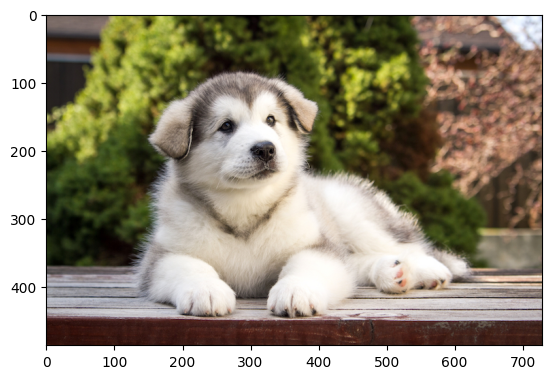

In [123]:
#acessing any image just for checking its acessible or not
img = cv2.imread(os.path.join('deeplearning','Puppies','Alaskan-Malamute-puppy-laying-down-outdoors.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
#Display the image
plt.imshow(img_rgb)
plt.axis('on')  # Optional: Hide axes
plt.show()

In [124]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('Alaskan-Malamute-puppy-laying-down-outdoors.jpg')

# Check if the image was loaded correctly
if img is None:
    print("Error: Image not loaded. Check the file path.")
else:
    # Convert the image from BGR to RGB format
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')  # Optional: Hide axes
    plt.show()

Error: Image not loaded. Check the file path.


In [125]:
# Loop through each class directory in the data directory
for image_class in os.listdir(data_dir): 
    # Loop through each image file in the current class directory
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # Construct the full path to the current image file
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Read the image file using OpenCV
            img = cv2.imread(image_path)
            # Determine the type of the image (e.g., jpeg, png) using imghdr
            tip = imghdr.what(image_path)
            # Check if the image type is not in the list of allowed extensions
            if tip not in image_exts:
                # Print a message indicating the image type is not allowed
                print('Image not in ext list {}'.format(image_path))
                # Remove the image file from the filesystem
                os.remove(image_path)
        except Exception as e:
            # Print a message indicating there was an issue with the image file
            print('Issue with image {}'.format(image_path))
            # Optionally remove the image file (currently commented out)
            # os.remove(image_path)


Issue with image deeplearning\kitten\.ipynb_checkpoints
Issue with image deeplearning\puppies\.ipynb_checkpoints


3. Load Data

In [126]:
# Import the numpy library, which provides support for large, multi-dimensional arrays and matrices, 
# along with a collection of mathematical functions to operate on these arrays
import numpy as np

# Import the pyplot module from the matplotlib library, which provides a MATLAB-like interface 
# for creating static, animated, and interactive visualizations in Python
from matplotlib import pyplot as plt

In [127]:
# Load images from the specified directory ('deeplearning') and create a dataset.
# This utility function from TensorFlow's Keras API scans the directory, identifies subdirectories as class labels,
# and organizes the images into a dataset suitable for training machine learning models.
data = tf.keras.utils.image_dataset_from_directory('deeplearning')

Found 676 files belonging to 2 classes.


In [128]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [133]:
# Convert the TensorFlow dataset into a Numpy iterator.
# This allows you to iterate over the dataset and access the data in the form of Numpy arrays,
# which can be useful for further processing or inspection.
data_iterator = data.as_numpy_iterator()

In [134]:
# Retrieve the next batch of data from the Numpy iterator.
# allowing you to access and process one batch of data at a time.
batch = data_iterator.next()

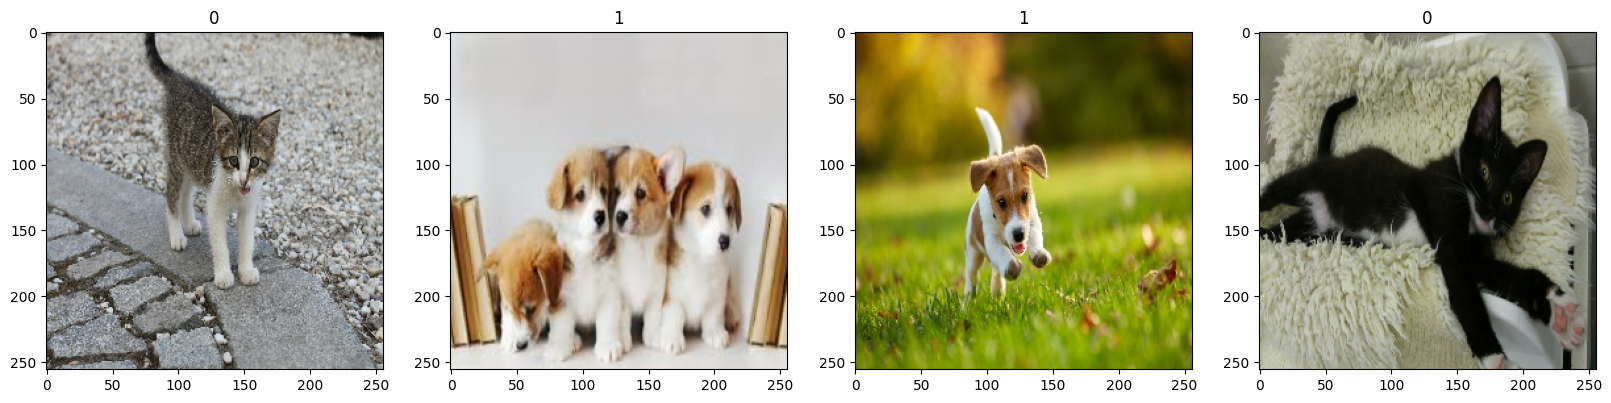

In [135]:
# Create a figure with a grid of subplots (1 row and 4 columns) and set the overall figure size to 20x20 inches.
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

# Loop over the first four images in the batch.
for idx, img in enumerate(batch[0][:4]):
    # Display the current image in the corresponding subplot.
    ax[idx].imshow(img.astype(int))
    
    # Set the title of the subplot to the label of the current image.
    # The label is accessed from the batch's labels array (batch[1]) using the current index.
    ax[idx].title.set_text(batch[1][idx])

In [136]:
#class 0=kitten
#class 1=puppies
batch[1]

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

4. Scale Data

In [137]:
# Normalize the images in the dataset by dividing each pixel value by 255.
# The lambda function applies this transformation to each image (x), while keeping the labels (y) unchanged.
data = data.map(lambda x, y: (x / 255, y))

In [138]:
# Convert the normalized TensorFlow dataset into a Numpy iterator.
# This allows you to iterate over the normalized dataset and access the data in the form of Numpy arrays,
scaled_iterator = data.as_numpy_iterator()

In [139]:
# Retrieve the next batch of data from the scaled Numpy iterator.
batch = scaled_iterator.next()

In [140]:
# Find and return the maximum pixel value in the batch of normalized images.
# Since the images have been normalized to the range [0, 1], this should return 1.0 if the normalization was done correctly.
batch[0].max()

1.0

In [141]:
# Find and return the minimum pixel value in the batch of normalized images.
batch[0].min()

0.0

5. Split Data

In [142]:
# Return the number of batches in the TensorFlow dataset.
len(data)


22

In [143]:
# Calculate the size of the training dataset.
# This is 70% of the total number of batches in the dataset.
train_size = int(len(data) * 0.7)

# Calculate the size of the validation dataset.
# This is 20% of the total number of batches in the dataset, plus one additional batch.
val_size = int(len(data) * 0.2) + 1

# Calculate the size of the test dataset.
# This is 10% of the total number of batches in the dataset, plus one additional batch.
test_size = int(len(data) * 0.1) + 1


In [144]:
train_size+val_size+test_size

23

In [145]:
# Create the training dataset by taking the first `train_size` batches from the original dataset.
train = data.take(train_size)

# Create the validation dataset by skipping the first `train_size` batches and then taking the next `val_size` batches.
val = data.skip(train_size).take(val_size)

# Create the test dataset by skipping the first `train_size` + `val_size` batches and then taking the remaining `test_size` batches.
test = data.skip(train_size + val_size).take(test_size)

6. Build Deep Learning Model

In [146]:
# Import the Sequential class from TensorFlow Keras, which allows for the creation of a linear stack of layers.
from tensorflow.keras.models import Sequential

# Import Conv2D layer for applying convolutional operations on 2D input (e.g., images).
# This layer extracts features by sliding convolutional filters over the input image.
from tensorflow.keras.layers import Conv2D

# Import MaxPooling2D layer for down-sampling the spatial dimensions (width and height) of the input feature maps.
# This helps in reducing the computational load and controlling overfitting.
from tensorflow.keras.layers import MaxPooling2D

# Import Dense layer for creating fully connected layers where each neuron is connected to every neuron in the previous layer.
# This layer is typically used in the final stages of a network for classification or regression tasks.
from tensorflow.keras.layers import Dense

# Import Flatten layer to convert the 2D matrix of feature maps into a 1D vector.
# This is necessary before passing the data to fully connected layers.
from tensorflow.keras.layers import Flatten

# Import Dropout layer to randomly set a fraction of input units to zero during training.
# This helps to prevent overfitting by making the network more robust.
from tensorflow.keras.layers import Dropout

In [147]:
model = Sequential()

In [148]:
# Add a 2D convolutional layer with 16 filters, each of size 3x3, stride of 1, and ReLU activation function.
# The input shape is specified as (256, 256, 3), which represents 256x256 RGB images.
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))

# Add a 2D max pooling layer to down-sample the spatial dimensions of the feature maps by taking the maximum value in each pool.
model.add(MaxPooling2D())

# Add another 2D convolutional layer with 32 filters, each of size 3x3, stride of 1, and ReLU activation function.
model.add(Conv2D(32, (3, 3), 1, activation='relu'))

# Add another 2D max pooling layer.
model.add(MaxPooling2D())

# Add a third 2D convolutional layer with 16 filters, each of size 3x3, stride of 1, and ReLU activation function.
model.add(Conv2D(16, (3, 3), 1, activation='relu'))

# Add another 2D max pooling layer.
model.add(MaxPooling2D())

# Flatten the 3D feature maps into a 1D vector to prepare them for the fully connected layers.
model.add(Flatten())

# Add a fully connected (dense) layer with 256 units and ReLU activation function.
model.add(Dense(256, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation function for binary classification.
# This layer produces a value between 0 and 1 representing the probability of the positive class.
model.add(Dense(1, activation='sigmoid'))

In [149]:
# Compile the model with the specified optimizer, loss function, and evaluation metrics.
# 'adam' is the optimizer used for training, which adjusts the learning rate during training.
model.compile(optimizer='adam', 
              # 'BinaryCrossentropy' is the loss function used for binary classification problems.
              loss=tf.losses.BinaryCrossentropy(), 
              # 'accuracy' is the metric used to evaluate the model's performance during training and testing.
              metrics=['accuracy'])

In [150]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

7. Train

In [151]:
# Define the directory where TensorBoard logs will be saved.
logdir = 'logs'

In [152]:
# Create a TensorBoard callback to log training metrics and other information to TensorBoard.
# TensorBoard uses these logs to visualize training progress, metrics, and other useful information.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [153]:
# Train the model on the training data for 20 epochs.
# During training, the model will also validate its performance on the validation dataset after each epoch.
# The TensorBoard callback is included to log training progress and metrics for visualization in TensorBoard.
hist = model.fit(train, 
                 epochs=20, 
                 validation_data=val, 
                 callbacks=[tensorboard_callback])

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 361ms/step - accuracy: 0.6843 - loss: 0.7680 - val_accuracy: 0.7625 - val_loss: 0.5308
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 346ms/step - accuracy: 0.7272 - loss: 0.5767 - val_accuracy: 0.6875 - val_loss: 0.5819
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 352ms/step - accuracy: 0.7848 - loss: 0.5027 - val_accuracy: 0.7000 - val_loss: 0.5570
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 330ms/step - accuracy: 0.7269 - loss: 0.5126 - val_accuracy: 0.7312 - val_loss: 0.4975
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 348ms/step - accuracy: 0.8052 - loss: 0.4094 - val_accuracy: 0.8062 - val_loss: 0.4731
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 324ms/step - accuracy: 0.8852 - loss: 0.3894 - val_accuracy: 0.8625 - val_loss: 0.3626
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - accuracy: 0.8959 - loss: 0.2697 - val_accuracy: 0.8938 - val_loss: 0.2672
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - accuracy: 0.9126 - loss: 0.2493 - val_accuracy: 0.

8. Plot Performance

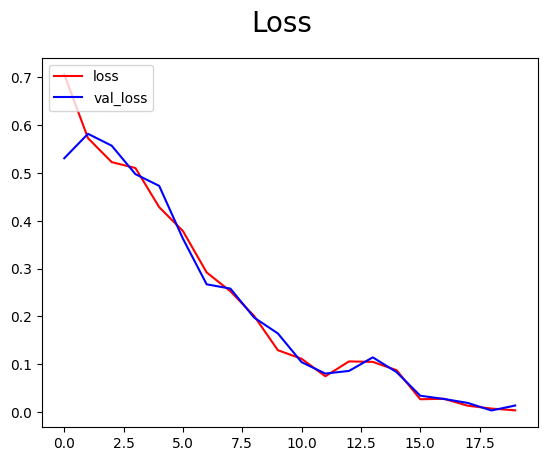

In [154]:
# Create a new figure for plotting the loss curves.
fig = plt.figure()

# Plot the training loss over epochs in red.
# 'hist.history['loss']' contains the loss values recorded during training.
plt.plot(hist.history['loss'], color='red', label='loss')

# Plot the validation loss over epochs in blue.
# 'hist.history['val_loss']' contains the loss values recorded during validation.
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')

# Set the title of the figure to 'Loss' with a font size of 20.
fig.suptitle('Loss', fontsize=20)

# Display a legend in the upper-left corner of the plot to distinguish between training and validation loss.
plt.legend(loc="upper left")

# Show the plot.
plt.show()

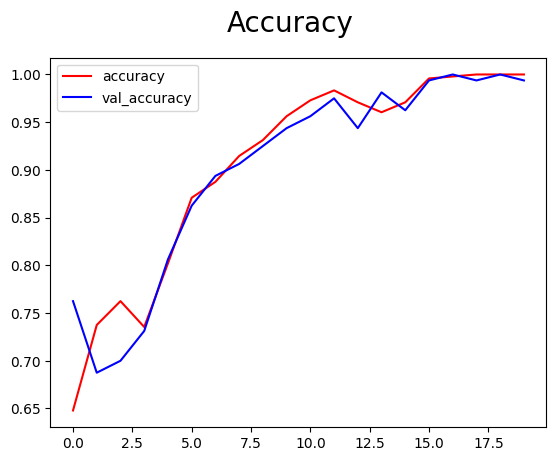

In [155]:
# Create a new figure for plotting the accuracy curves.
fig = plt.figure()

# Plot the training accuracy over epochs in red.
# 'hist.history['accuracy']' contains the accuracy values recorded during training.
plt.plot(hist.history['accuracy'], color='red', label='accuracy')

# Plot the validation accuracy over epochs in blue.
# 'hist.history['val_accuracy']' contains the accuracy values recorded during validation.
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')

# Set the title of the figure to 'Accuracy' with a font size of 20.
fig.suptitle('Accuracy', fontsize=20)

# Display a legend in the upper-left corner of the plot to distinguish between training and validation accuracy.
plt.legend(loc="upper left")

# Show the plot.
plt.show()

9. Evaluate

In [156]:
# Import the Precision metric from TensorFlow Keras to evaluate the model's precision.
# Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
from tensorflow.keras.metrics import Precision

# Import the Recall metric from TensorFlow Keras to evaluate the model's recall.
# Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset.
from tensorflow.keras.metrics import Recall

# Import the BinaryAccuracy metric from TensorFlow Keras to evaluate the model's binary accuracy.
# BinaryAccuracy measures the proportion of correct predictions in binary classification tasks (where each sample belongs to one of two classes).
from tensorflow.keras.metrics import BinaryAccuracy

In [157]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [158]:
# Iterate over batches in the test dataset converted to a Numpy iterator.
for batch in test.as_numpy_iterator(): 
    # Unpack the batch into features (X) and labels (y).
    X, y = batch
    
    # Use the model to make predictions on the batch of features (X).
    yhat = model.predict(X)
    
    # Update the state of the Precision metric with the true labels (y) and predicted labels (yhat).
    pre.update_state(y, yhat)
    
    # Update the state of the Recall metric with the true labels (y) and predicted labels (yhat).
    re.update_state(y, yhat)
    
    # Update the state of the BinaryAccuracy metric with the true labels (y) and predicted labels (yhat).
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [159]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.962963, shape=(), dtype=float32) tf.Tensor(0.9722222, shape=(), dtype=float32)


10. Test

In [183]:
import cv2

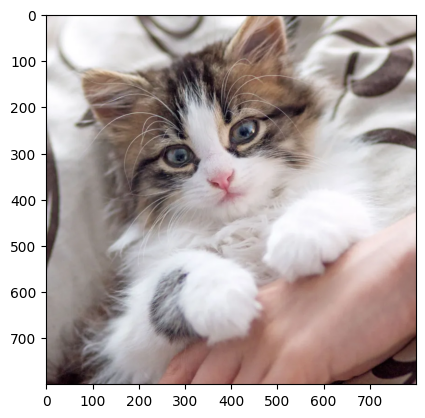

In [197]:
img = cv2.imread('cattt.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

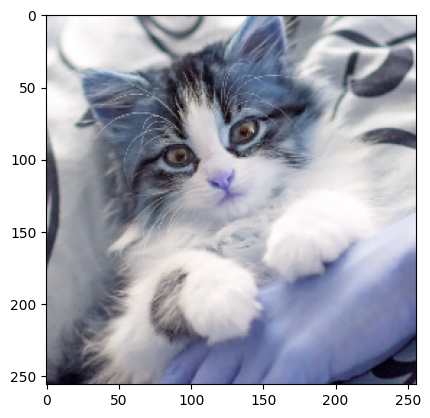

In [198]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [199]:
# Make a prediction using the trained model for a single image.
# The image is first resized and normalized by dividing pixel values by 255.
# np.expand_dims adds an extra dimension to the image to match the expected input shape (batch size of 1).
yhat = model.predict(np.expand_dims(resize / 255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [200]:
yhat

array([[0.00319709]], dtype=float32)

In [201]:
if yhat > 0.5: 
    print(f'Predicted class is puppies')
else:
    print(f'Predicted class is kitten')

Predicted class is kitten


11. Save the Model

In [202]:
# Import the `load_model` function from TensorFlow Keras to load a saved model.
# This function allows you to load a previously saved model from a file, including its architecture, weights, and training configuration.
from tensorflow.keras.models import load_model

In [203]:
model.save(os.path.join('models','imageclassifier.h5'))

In [204]:
os.path.join('models','imageclassifier.h5')

'models\\imageclassifier.h5'

In [205]:
new_model = load_model('models\\imageclassifier.h5')

In [206]:
yhatnew=new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [207]:
if yhatnew > 0.5:
    print(f'predicted class is puppies')
else:
    print(f'pridicted class is kitten')

pridicted class is kitten
